# Example reduction

https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html

In [1]:
import sys
import os
sys.path.append(os.path.expanduser('~/git/LiquidsReflectometer/reduction'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

#%matplotlib notebook
%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

In [2]:
import mantid
import mantid.simpleapi as api
mantid.kernel.config.setLogLevel(3)

ConfigService-[Error] logging set to error priority


In [3]:
print(mantid.__version__)
print(sys.version)

6.8.0
3.10.13 | packaged by conda-forge | (main, Oct 26 2023, 18:07:37) [GCC 12.3.0]


In [206]:
import importlib
from lr_reduction import workflow
from lr_reduction import template
from lr_reduction import output
from lr_reduction import event_reduction
from lr_reduction import background
from lr_reduction import reduction_template_reader

In [244]:
importlib.reload(workflow)
importlib.reload(output)
importlib.reload(template)
importlib.reload(event_reduction)
importlib.reload(background)

data_dir = os.path.expanduser('~/git/LiquidsReflectometer/reduction/data')
template_path = os.path.join(data_dir, 'template.xml')

# For automated testing, the data location is relative
os.chdir(os.path.expanduser('~/git/LiquidsReflectometer/reduction'))

for i in range(198409, 198417):
#for i in range(198415, 198416):
    ws = api.Load("REF_L_%s" % i)
    workflow.reduce(ws, template_path, output_dir=data_dir, average_overlap=False)


wl=15; ths=-0.600382; thi=-0.00812677; No offset
Background range incompatible with functional background: switching to averaging
Background on both sides: [133 135] [148 150]
Normalization options: True True
wl=12.386; ths=-0.600058; thi=-0.00812677; No offset
Background range incompatible with functional background: switching to averaging
Background on both sides: [133 135] [148 150]
Normalization options: True True
wl=9.74; ths=-0.600058; thi=-0.00812677; No offset
Background range incompatible with functional background: switching to averaging
Background on both sides: [133 135] [148 150]
Normalization options: True True
wl=7.043; ths=-0.599896; thi=-0.00812677; No offset
Background range incompatible with functional background: switching to averaging
Background on both sides: [133 135] [148 150]
Normalization options: True True
wl=4.25; ths=-0.599733; thi=-0.00812677; No offset
Background range incompatible with functional background: switching to averaging
Background on both side

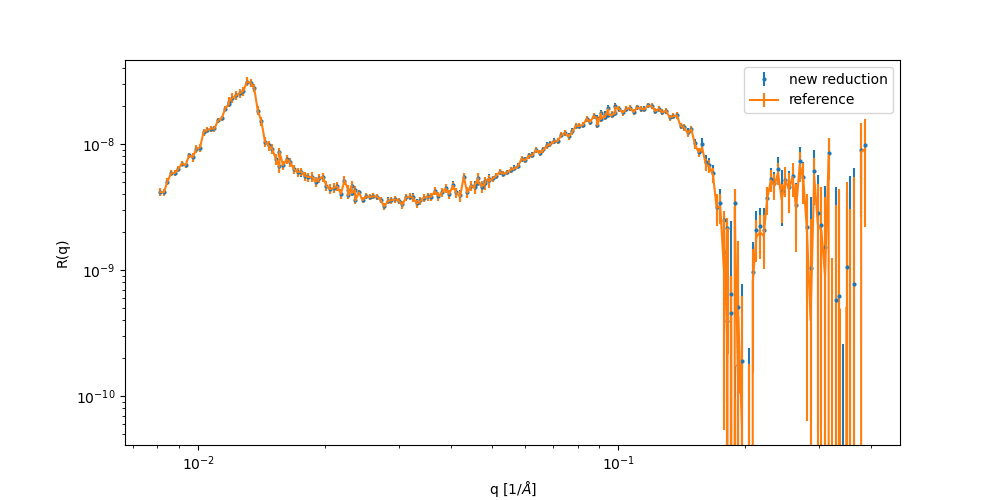

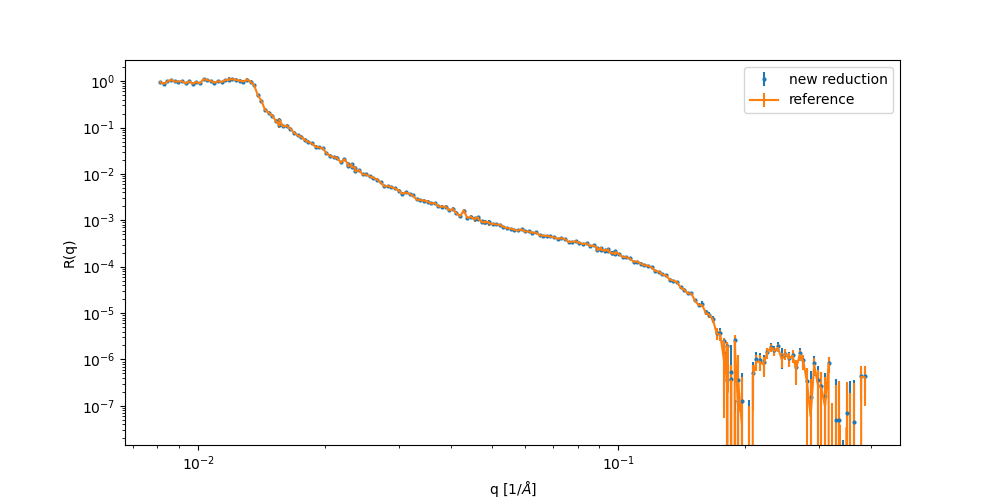

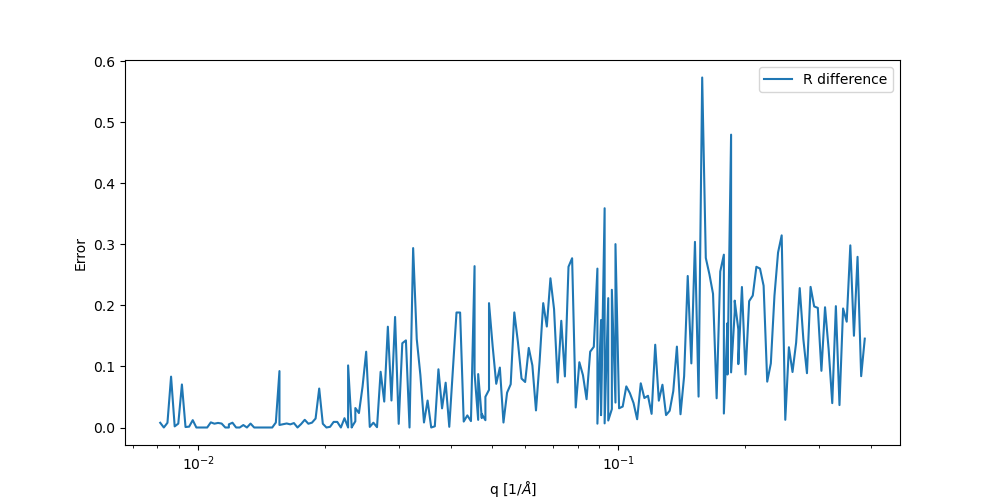

(4, 217) (4, 217)


In [242]:
reduced_path = os.path.join(data_dir, 'reference_rq.txt')
if os.path.isfile(reduced_path):
    _data = np.loadtxt(reduced_path).T

reduced_path = os.path.join(data_dir, 'REFL_198409_combined_data_auto.txt')
if os.path.isfile(reduced_path):
    _refl = np.loadtxt(reduced_path).T

fig, ax = plt.subplots(figsize=(10,5))
plt.errorbar(_refl[0], _refl[1]*_refl[0]**4, yerr=_refl[2]*_refl[0]**4, markersize=4, marker='.', linestyle='', label='new reduction')
plt.errorbar(_data[0], _data[1]*_data[0]**4, yerr=_data[2]*_data[0]**4, markersize=4, marker='', linestyle='-', label='reference')

plt.legend()
plt.xlabel('q [$1/\AA$]')
plt.ylabel('R(q)')
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
plt.errorbar(_refl[0], _refl[1], yerr=_refl[2], markersize=4, marker='.', linestyle='', label='new reduction')
plt.errorbar(_data[0], _data[1], yerr=_data[2], markersize=4, marker='', linestyle='-', label='reference')

plt.legend()
plt.xlabel('q [$1/\AA$]')
plt.ylabel('R(q)')
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

if len(_data[1])==len(_refl[1]):
    # dQ is computed for each run in the new implementation
    fig, ax = plt.subplots(figsize=(10,5))
    plt.plot(_refl[0], np.fabs(_data[1]-_refl[1])/_refl[2], label="R difference")
    #plt.plot(_refl[0], (_data[2]-_refl[2])/_refl[2], label="dR difference")
    #plt.plot(_data[0], np.fabs(_data[2]/_data[1]), label="reference")
    #plt.plot(_data[0], np.fabs(_data[2]-_refl[2]), label="reference")
    plt.xlabel('q [$1/\AA$]')
    plt.ylabel('Error')
    ax.set_yscale('linear')
    ax.set_xscale('log')
    plt.legend()
    plt.show()
else:
    print("len(ref) = %s; len(new) = %s" % (len(_data[1]), len(_refl[1])))

print(_data.shape, _refl.shape)
